In [6]:
import folium
import json

crime_gu = pd.read_csv('./seoul_crime_result.csv', encoding = 'utf-8')
geo_path = './data/03_skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding = 'utf-8'))

crime_gu.head()

,구,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
0,강남구,607,20,7,3130,3956,81.713344,100.000000,100.0,44.185304,86.223458
1,강동구,172,10,5,1645,2429,98.255814,100.000000,100.0,57.689970,86.825854
2,강북구,208,7,8,1014,2156,73.557692,71.428571,100.0,62.623274,93.831169
3,강서구,316,4,11,1888,2916,80.063291,100.000000,100.0,58.951271,87.242798
4,관악구,379,7,8,1979,3152,85.224274,85.714286,87.5,58.211218,84.581218


In [8]:
my_map = folium.Map(location = [37.5502, 126.982], zoom_start = 11, tiles = 'stamen Toner')

folium.Choropleth(
    geo_data=geo_str,
    data=crime_gu, columns=['구','살인'],
    nan_fill_color='purple',nan_fill_opacity=0.4,
    key_on ='feature.id', fill_color='PuRd',
    legend_name = '살인 발생 건수'
).add_to(my_map)

my_map

In [11]:
my_map = folium.Map(location = [37.5502, 126.982], zoom_start = 11, tiles = 'stamen Toner')

folium.Choropleth(
    geo_data=geo_str,
    data=crime_gu, columns=['구','강간'],
    nan_fill_color='purple',nan_fill_opacity=0.4,
    key_on ='feature.id', fill_color='PuRd',
    legend_name = '강간생 건수'
).add_to(my_map)

my_map

In [12]:
my_map = folium.Map(location = [37.5502, 126.982], zoom_start = 11, tiles = 'stamen Toner')

folium.Choropleth(
    geo_data=geo_str,
    data=crime_gu, columns=['구','폭력'],
    nan_fill_color='purple',nan_fill_opacity=0.4,
    key_on ='feature.id', fill_color='PuRd',
    legend_name = '폭력 발생 건수'
).add_to(my_map)

my_map

In [17]:
import numpy as np

crime_raw_data = pd.read_csv('./seoul_crime/2000년.csv',
                            usecols=[0,1,2,3], encoding = 'euc-kr')
crime_raw_data.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,1
1,중부,살인,검거,1
2,중부,강도,발생,17
3,중부,강도,검거,15
4,중부,강간,발생,14


In [23]:
crime_station = crime_raw_data.pivot_table(
    crime_raw_data, index=["구분"], columns=["죄종","발생검거"], aggfunc=[np.sum])

crime_station.columns = crime_station.columns.droplevel([0,1,2])
crime_station.head()

발생검거,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생
구분,,,,,,,,,,
강남,70,78,72,146,4,3,523,2653,4345,4892
강동,58,62,40,49,11,12,671,1838,4333,4716
강북,48,47,48,47,8,9,458,859,3446,3624
강서,64,75,55,75,7,6,509,1559,3988,4361
관악,44,59,36,56,7,8,349,1764,2658,2921


In [24]:
crime_station.columns = ["강간","1","강도","2","살인","3","절도","4","폭력","5"]
cirme_station = crime_station[['강간','강도','살인','절도','폭력']]

crime_station.head()

,강간,1,강도,2,살인,3,절도,4,폭력,5
구분,,,,,,,,,,
강남,70,78,72,146,4,3,523,2653,4345,4892
강동,58,62,40,49,11,12,671,1838,4333,4716
강북,48,47,48,47,8,9,458,859,3446,3624
강서,64,75,55,75,7,6,509,1559,3988,4361
관악,44,59,36,56,7,8,349,1764,2658,2921


In [25]:
crime_station['year'] = 2000

crime_station.head()

,강간,1,강도,2,살인,3,절도,4,폭력,5,year
구분,,,,,,,,,,,
강남,70,78,72,146,4,3,523,2653,4345,4892,2000
강동,58,62,40,49,11,12,671,1838,4333,4716,2000
강북,48,47,48,47,8,9,458,859,3446,3624,2000
강서,64,75,55,75,7,6,509,1559,3988,4361,2000
관악,44,59,36,56,7,8,349,1764,2658,2921,2000


In [29]:
from glob import glob

glob('./seoul_crime/*')

['./seoul_crime\\2000년.csv',
 './seoul_crime\\2001년.csv',
 './seoul_crime\\2002년.csv',
 './seoul_crime\\2003년.csv',
 './seoul_crime\\2004년.csv',
 './seoul_crime\\2005년.csv',
 './seoul_crime\\2006년.csv',
 './seoul_crime\\2007년.csv',
 './seoul_crime\\2008년.csv',
 './seoul_crime\\2009년.csv',
 './seoul_crime\\2010년.csv',
 './seoul_crime\\2011년.csv',
 './seoul_crime\\2012년.csv',
 './seoul_crime\\2013년.csv',
 './seoul_crime\\2014년.csv',
 './seoul_crime\\2015년.csv',
 './seoul_crime\\2016년.csv',
 './seoul_crime\\2017년.csv']

In [30]:
file_list = glob('./seoul_crime/*.csv')
file_list

['./seoul_crime\\2000년.csv',
 './seoul_crime\\2001년.csv',
 './seoul_crime\\2002년.csv',
 './seoul_crime\\2003년.csv',
 './seoul_crime\\2004년.csv',
 './seoul_crime\\2005년.csv',
 './seoul_crime\\2006년.csv',
 './seoul_crime\\2007년.csv',
 './seoul_crime\\2008년.csv',
 './seoul_crime\\2009년.csv',
 './seoul_crime\\2010년.csv',
 './seoul_crime\\2011년.csv',
 './seoul_crime\\2012년.csv',
 './seoul_crime\\2013년.csv',
 './seoul_crime\\2014년.csv',
 './seoul_crime\\2015년.csv',
 './seoul_crime\\2016년.csv',
 './seoul_crime\\2017년.csv']

In [31]:
for each_file in file_list:
    print(each_file)

./seoul_crime\2000년.csv
./seoul_crime\2001년.csv
./seoul_crime\2002년.csv
./seoul_crime\2003년.csv
./seoul_crime\2004년.csv
./seoul_crime\2005년.csv
./seoul_crime\2006년.csv
./seoul_crime\2007년.csv
./seoul_crime\2008년.csv
./seoul_crime\2009년.csv
./seoul_crime\2010년.csv
./seoul_crime\2011년.csv
./seoul_crime\2012년.csv
./seoul_crime\2013년.csv
./seoul_crime\2014년.csv
./seoul_crime\2015년.csv
./seoul_crime\2016년.csv
./seoul_crime\2017년.csv


In [62]:
crime_raw_data = pd.read_csv('./seoul_crime/2000년.csv',
                            usecols=[0,1,2,3],encoding='euc-kr')

crime_station = crime_raw_data.pivot_table(
    crime_raw_data, index=['구분'], columns=['죄종','발생검거'], aggfunc=[np.sum])

crime_station.columns = crime_station.columns.droplevel([0,1,2])

crime_station.columns = ['강간','1','강도','2','살인','3','절도','4','폭력','5']
cirme_station = crime_station[['강간','강도','살인','절도','폭력']]

crime_station['year']=2000
crime_station.head()

,강간,1,강도,2,살인,3,절도,4,폭력,5,year
구분,,,,,,,,,,,
강남,70,78,72,146,4,3,523,2653,4345,4892,2000
강동,58,62,40,49,11,12,671,1838,4333,4716,2000
강북,48,47,48,47,8,9,458,859,3446,3624,2000
강서,64,75,55,75,7,6,509,1559,3988,4361,2000
관악,44,59,36,56,7,8,349,1764,2658,2921,2000


In [63]:
for each_file in file_list:
    print(each_file.split('/'))

['.', 'seoul_crime\\2000년.csv']
['.', 'seoul_crime\\2001년.csv']
['.', 'seoul_crime\\2002년.csv']
['.', 'seoul_crime\\2003년.csv']
['.', 'seoul_crime\\2004년.csv']
['.', 'seoul_crime\\2005년.csv']
['.', 'seoul_crime\\2006년.csv']
['.', 'seoul_crime\\2007년.csv']
['.', 'seoul_crime\\2008년.csv']
['.', 'seoul_crime\\2009년.csv']
['.', 'seoul_crime\\2010년.csv']
['.', 'seoul_crime\\2011년.csv']
['.', 'seoul_crime\\2012년.csv']
['.', 'seoul_crime\\2013년.csv']
['.', 'seoul_crime\\2014년.csv']
['.', 'seoul_crime\\2015년.csv']
['.', 'seoul_crime\\2016년.csv']
['.', 'seoul_crime\\2017년.csv']


In [67]:
for each_file in file_list:
    print(each_file.split('\\')[-1])

2000년.csv
2001년.csv
2002년.csv
2003년.csv
2004년.csv
2005년.csv
2006년.csv
2007년.csv
2008년.csv
2009년.csv
2010년.csv
2011년.csv
2012년.csv
2013년.csv
2014년.csv
2015년.csv
2016년.csv
2017년.csv


In [68]:
for each_file in file_list:
    print(each_file.split('\\')[-1][:4])

2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


In [70]:
crime_station_t = []

for each_file in file_list:
    crime_raw_data = pd.read_csv(each_file, usecols=[0,1,2,3], encoding='euc-kr')
    
    crime_station = crime_raw_data.pivot_table(
        crime_raw_data, index=["구분"], columns=["죄종","발생검거"],aggfunc=[np.sum])
    
    crime_station.columns = crime_station.columns.droplevel([0,1,2])
 
    crime_station.columns = ['강간','1','강도','2','살인','3','절도','4','폭력','5']
    cirme_station = crime_station[['강간','강도','살인','절도','폭력']]

    crime_station['year']=each_file.split('\\')[-1][:4]
    
    crime_station.reset_index(inplace=True)
    crime_station_t.append(crime_station)
    

In [71]:
crime_total = pd.concat(crime_station_t)
crime_total.head()

,구분,강간,1,강도,2,살인,3,절도,4,폭력,5,year
0,강남,70.0,78.0,72.0,146.0,4.0,3.0,523.0,2653.0,4345.0,4892.0,2000
1,강동,58.0,62.0,40.0,49.0,11.0,12.0,671.0,1838.0,4333.0,4716.0,2000
2,강북,48.0,47.0,48.0,47.0,8.0,9.0,458.0,859.0,3446.0,3624.0,2000
3,강서,64.0,75.0,55.0,75.0,7.0,6.0,509.0,1559.0,3988.0,4361.0,2000
4,관악,44.0,59.0,36.0,56.0,7.0,8.0,349.0,1764.0,2658.0,2921.0,2000


In [72]:
crime_total_murder = crime_total.pivot('year','구분','살인')
crime_total_murder

구분,강남,강동,강북,강서,관악,광진,구로,금천,남대문,노원,...,수서,양천,영등포,용산,은평,종로,종암,중랑,중부,혜화
year,,,,,,,,,,,,,,,,,,,,,
2000,4.0,11.0,8.0,7.0,7.0,5.0,10.0,9.0,3.0,3.0,...,3.0,6.0,7.0,4.0,1.0,4.0,8.0,12.0,1.0,3.0
2001,18.0,11.0,4.0,18.0,2.0,18.0,5.0,16.0,6.0,9.0,...,5.0,8.0,9.0,3.0,7.0,3.0,12.0,17.0,0.0,4.0
2002,6.0,6.0,7.0,10.0,8.0,15.0,7.0,22.0,3.0,6.0,...,8.0,7.0,2.0,3.0,3.0,1.0,5.0,8.0,2.0,4.0
2003,10.0,6.0,8.0,5.0,3.0,8.0,6.0,14.0,2.0,4.0,...,4.0,7.0,9.0,12.0,6.0,3.0,4.0,13.0,0.0,6.0
2004,6.0,7.0,15.0,7.0,0.0,10.0,13.0,14.0,2.0,5.0,...,5.0,6.0,3.0,8.0,5.0,0.0,6.0,6.0,2.0,6.0
2005,10.0,6.0,9.0,8.0,4.0,16.0,11.0,14.0,1.0,11.0,...,5.0,10.0,3.0,9.0,6.0,3.0,5.0,15.0,3.0,2.0
2006,6.0,3.0,7.0,15.0,4.0,7.0,13.0,6.0,2.0,7.0,...,5.0,6.0,10.0,8.0,3.0,7.0,4.0,13.0,4.0,6.0
2007,4.0,9.0,12.0,3.0,10.0,8.0,19.0,6.0,1.0,10.0,...,3.0,8.0,12.0,7.0,6.0,4.0,9.0,14.0,4.0,2.0
2008,3.0,8.0,8.0,17.0,9.0,5.0,23.0,3.0,1.0,4.0,...,5.0,12.0,18.0,6.0,6.0,6.0,6.0,7.0,4.0,3.0


In [73]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False


f_path = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font',family=font_name)

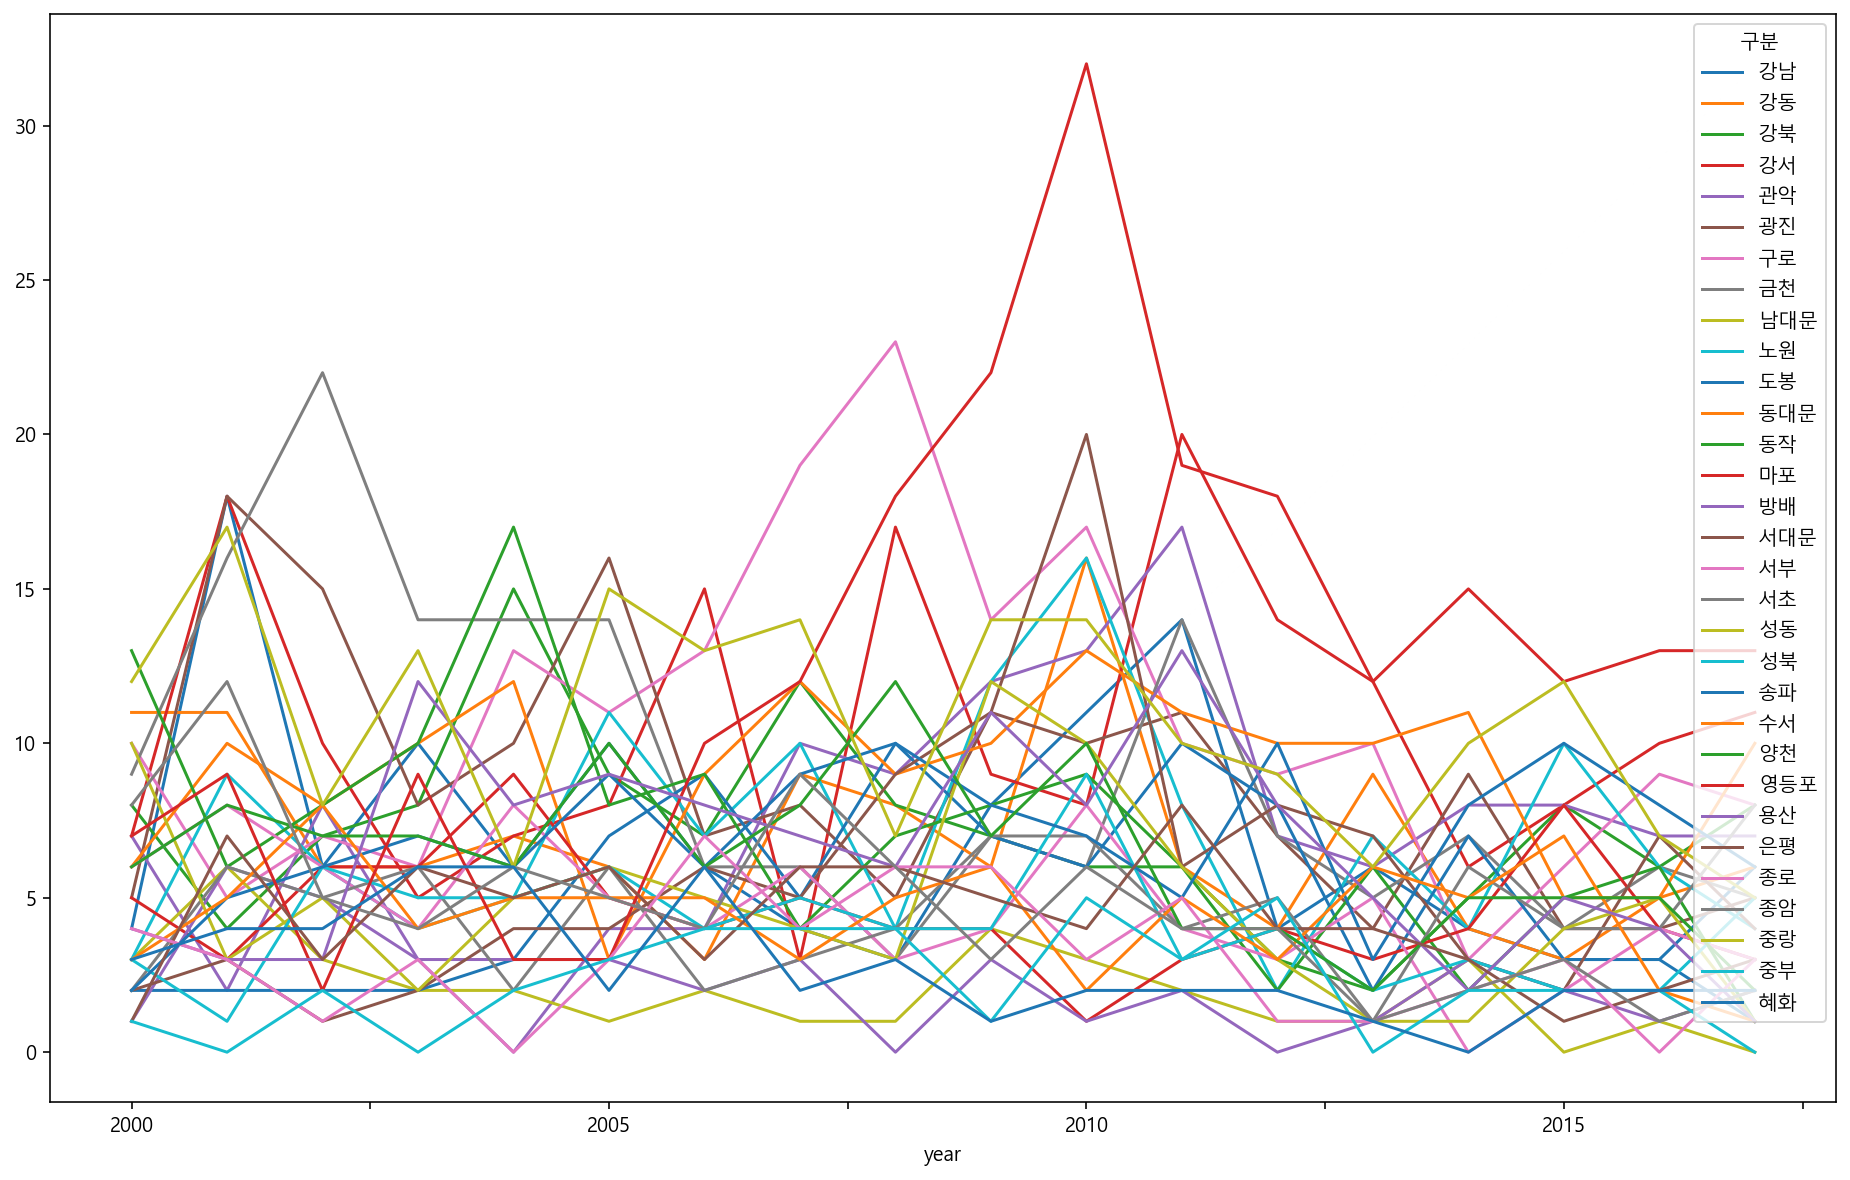

In [74]:
crime_total_murder.plot(figsize=(16,10))
plt.show()

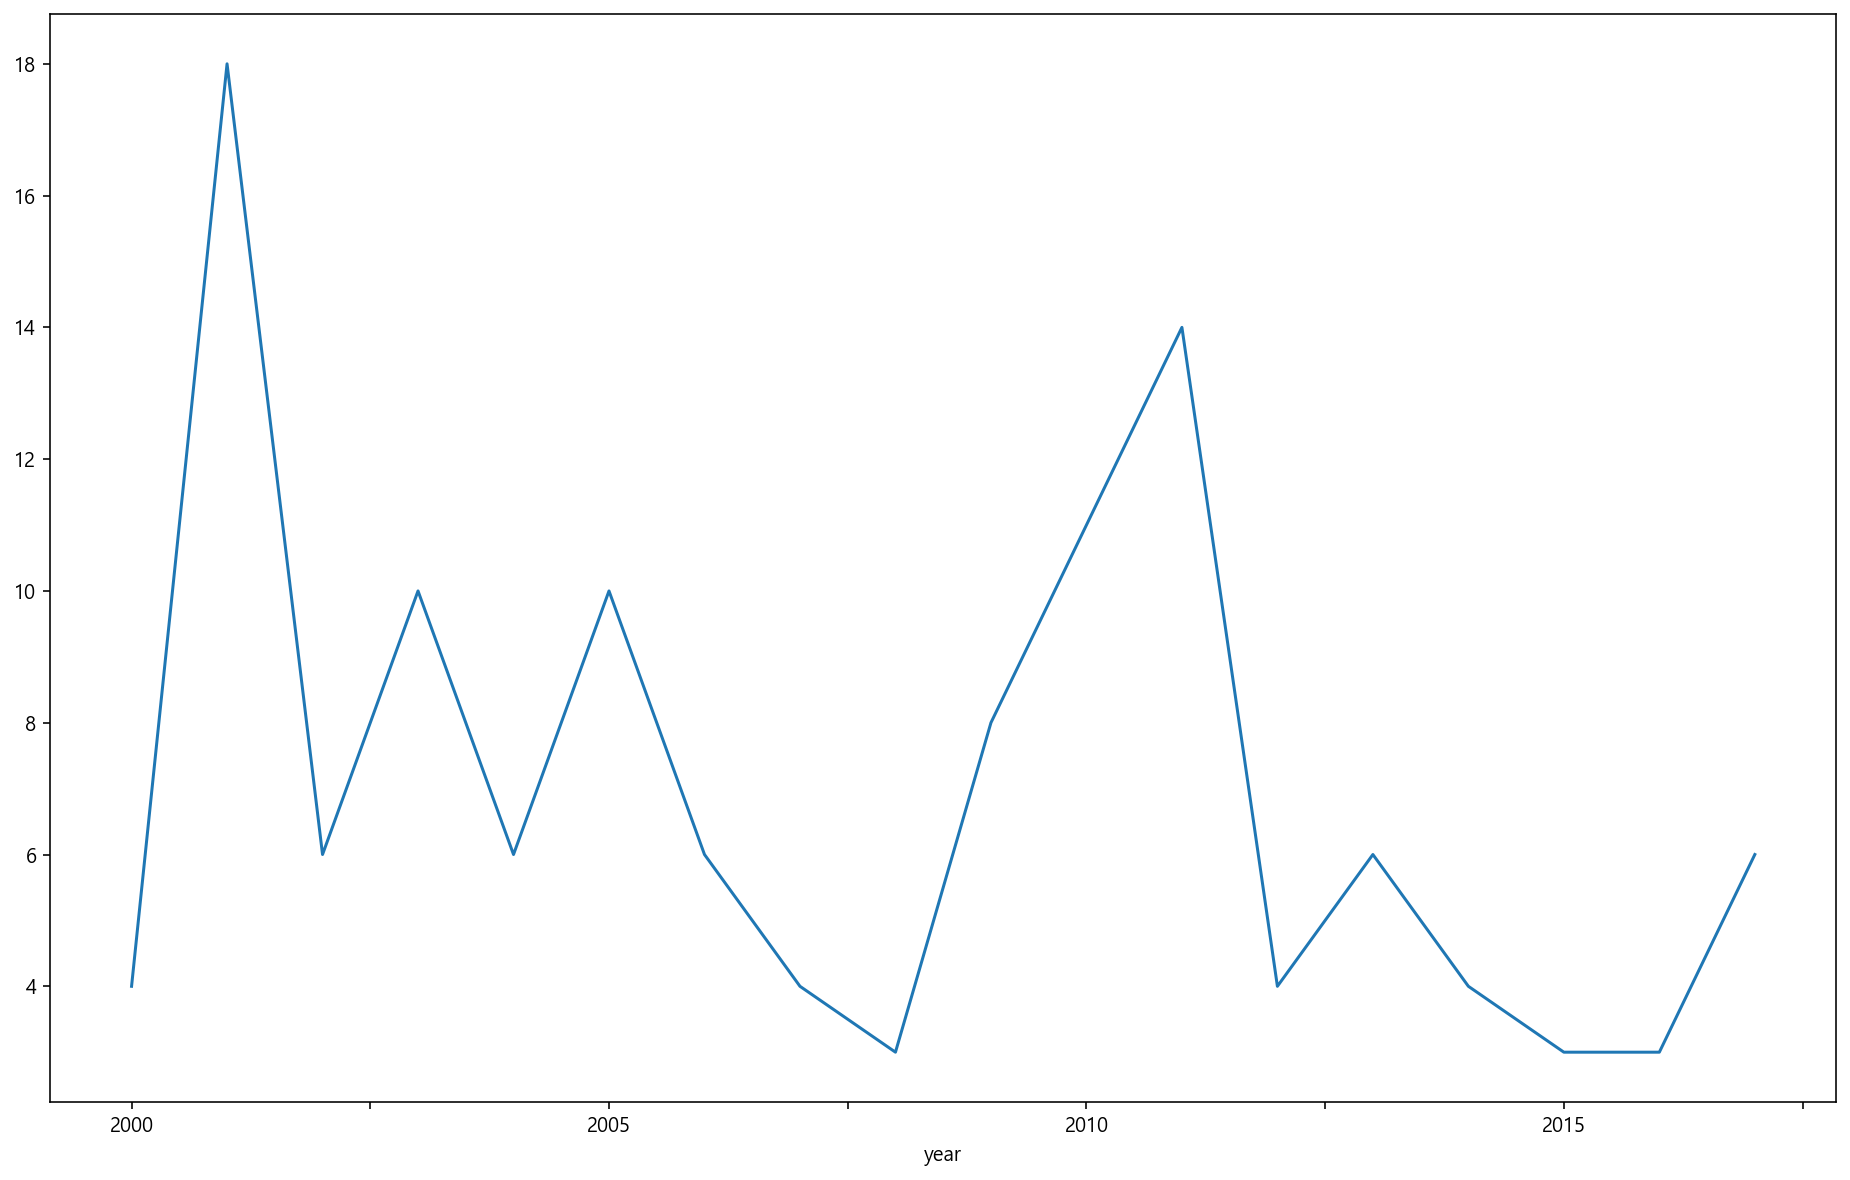

In [75]:
crime_total_murder['강남'].plot(figsize=(16,10))
plt.show()

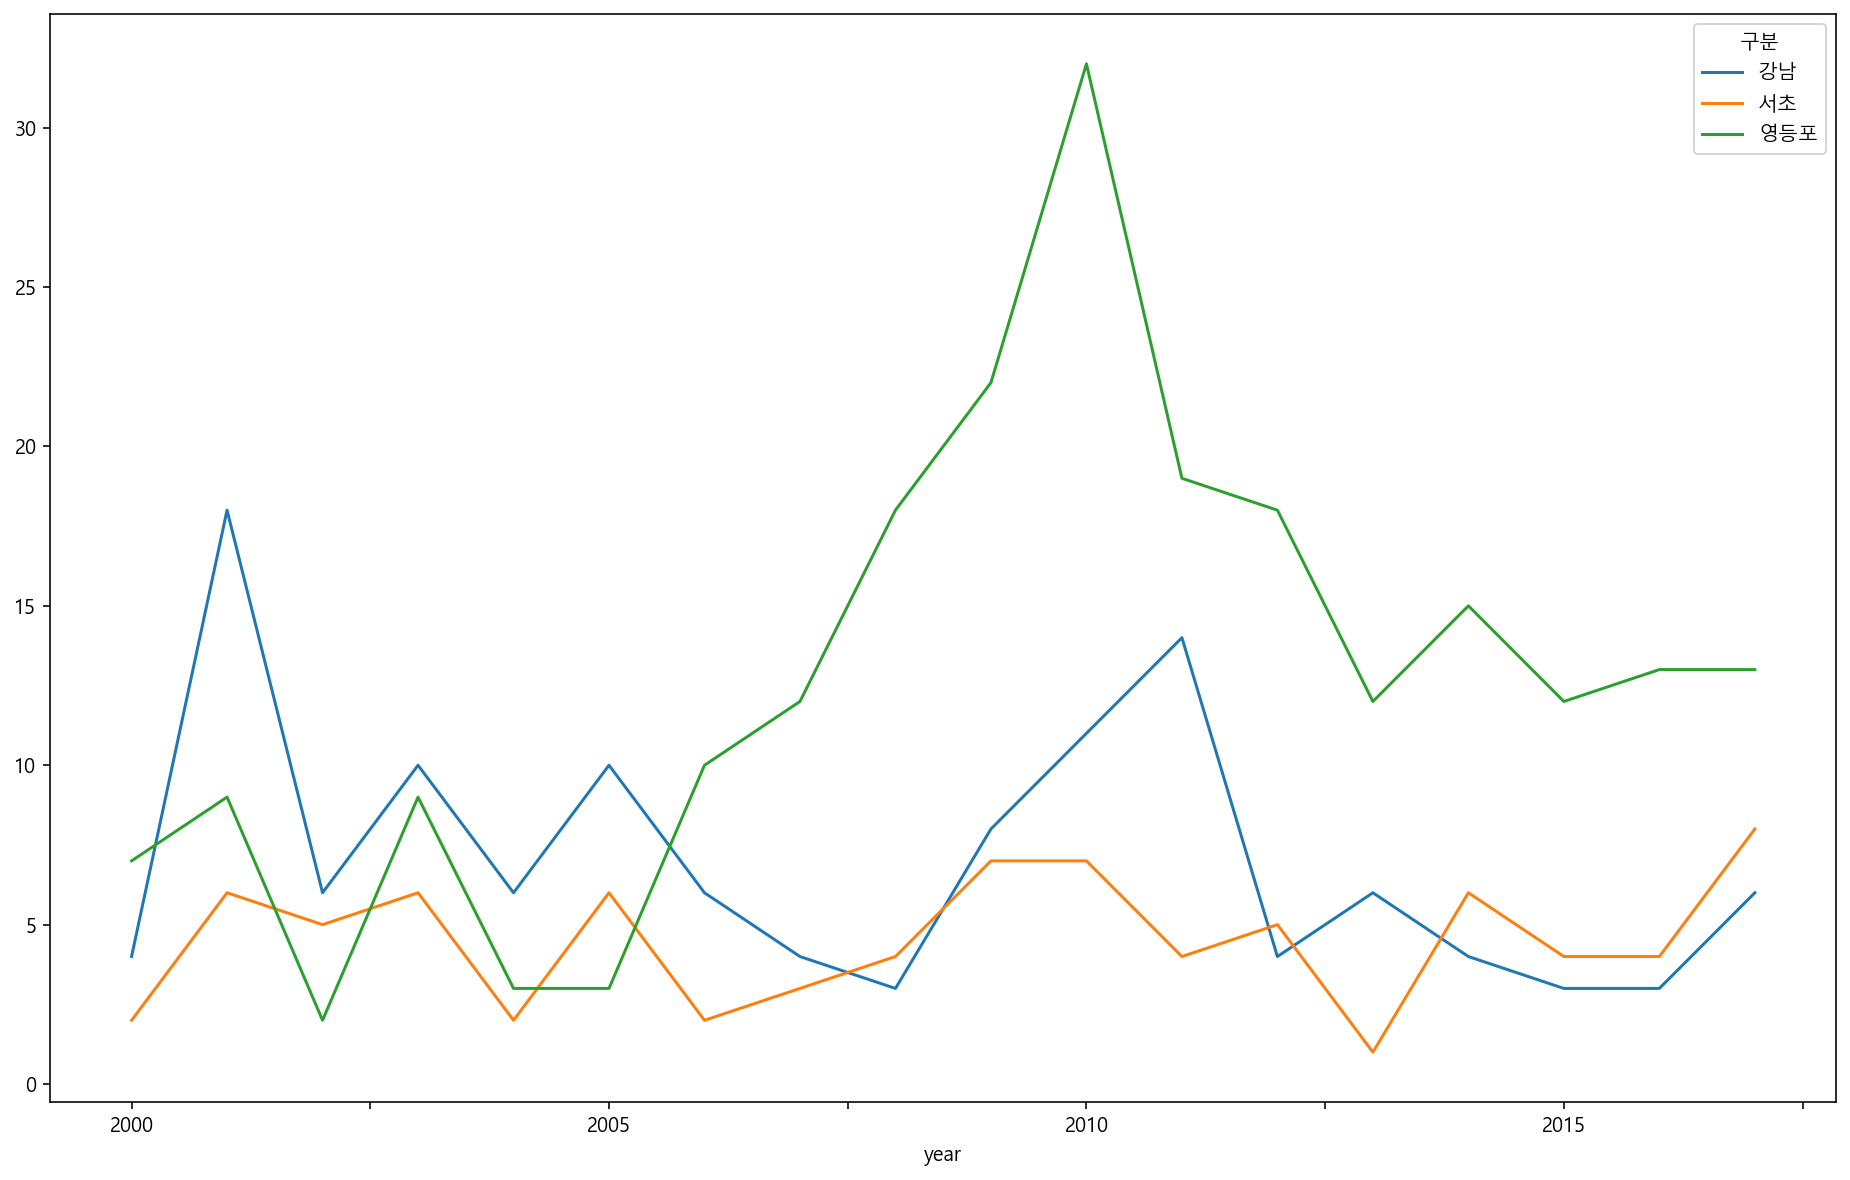

In [76]:
crime_total_murder[['강남','서초','영등포']].plot(figsize=(16,10))
plt.show()

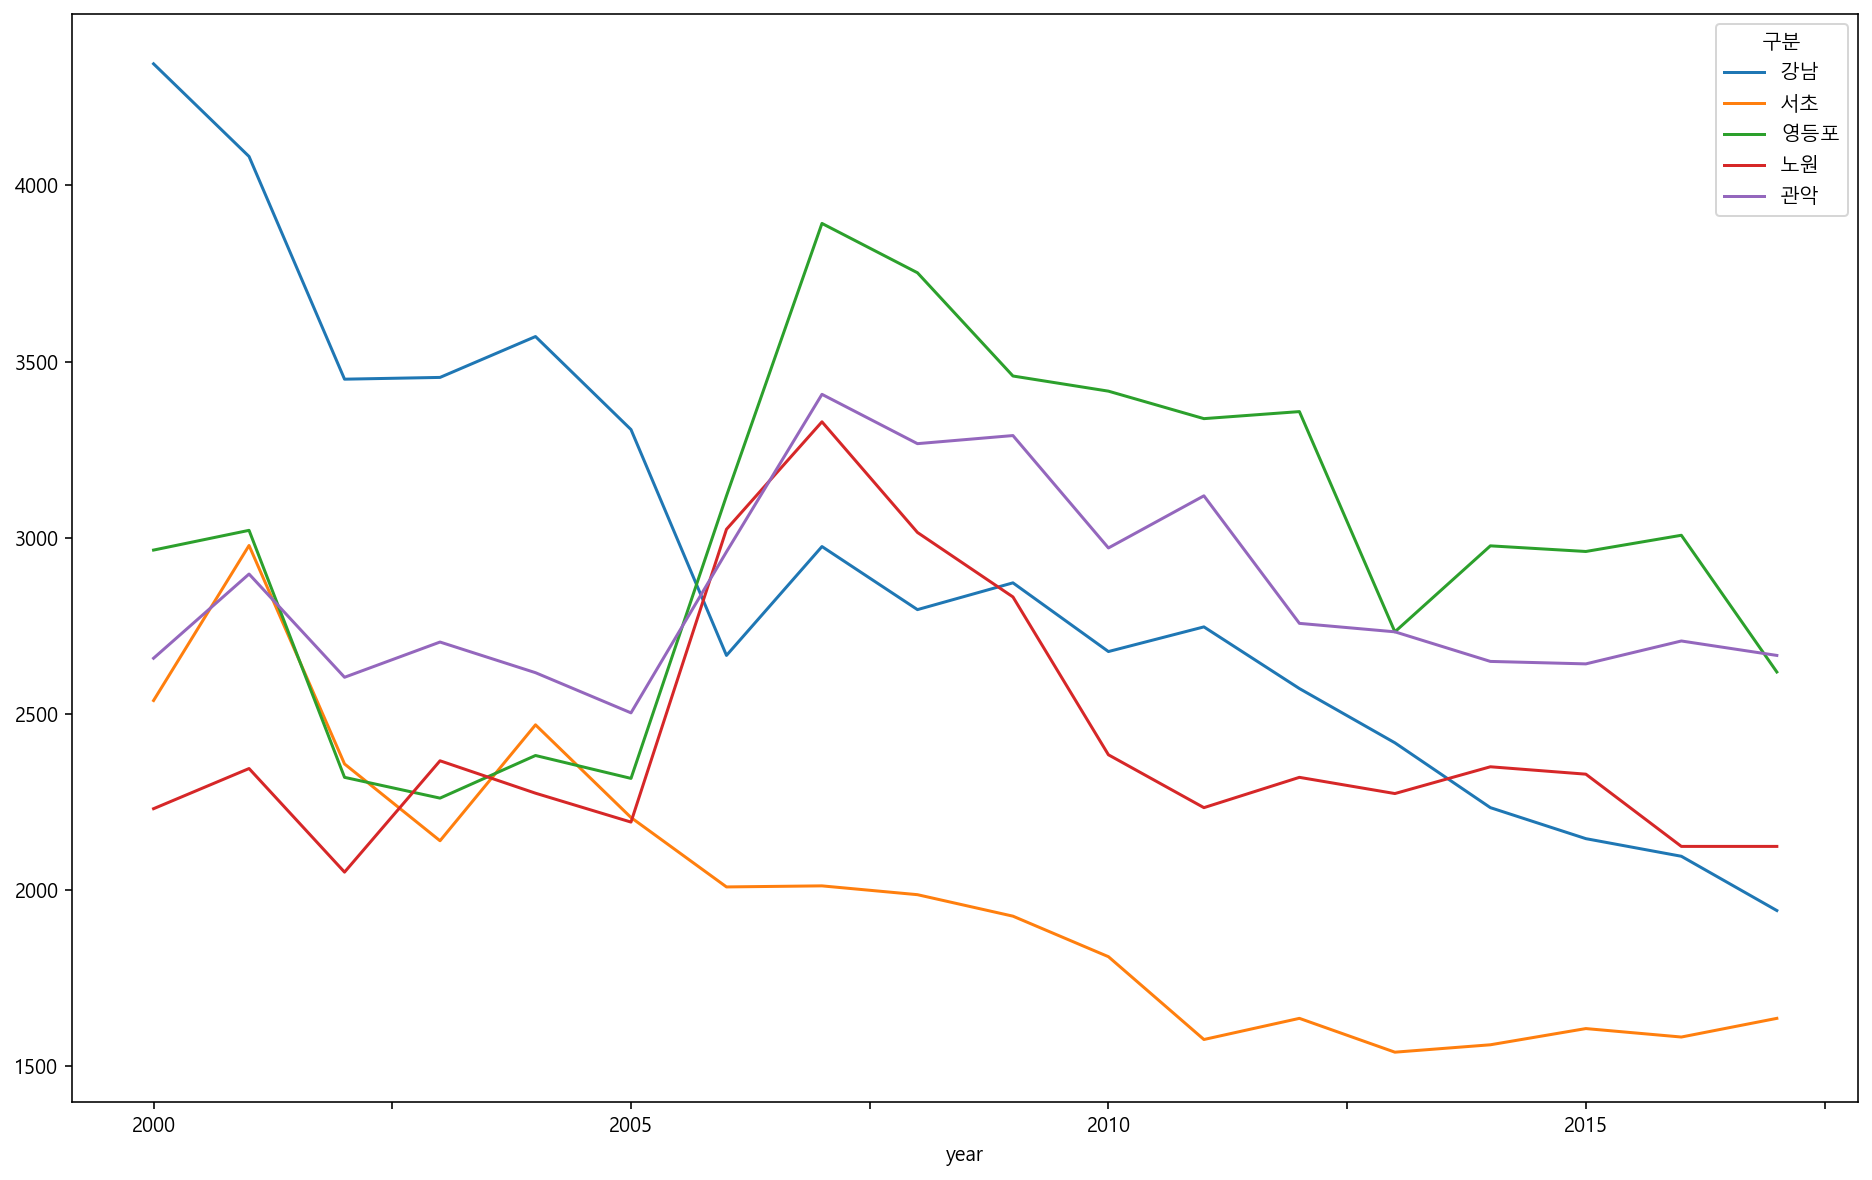

In [78]:
crime_total_violence = crime_total.pivot('year','구분','폭력')
crime_total_violence[['강남','서초','영등포','노원','관악']].plot(figsize=(16,10))
plt.show()

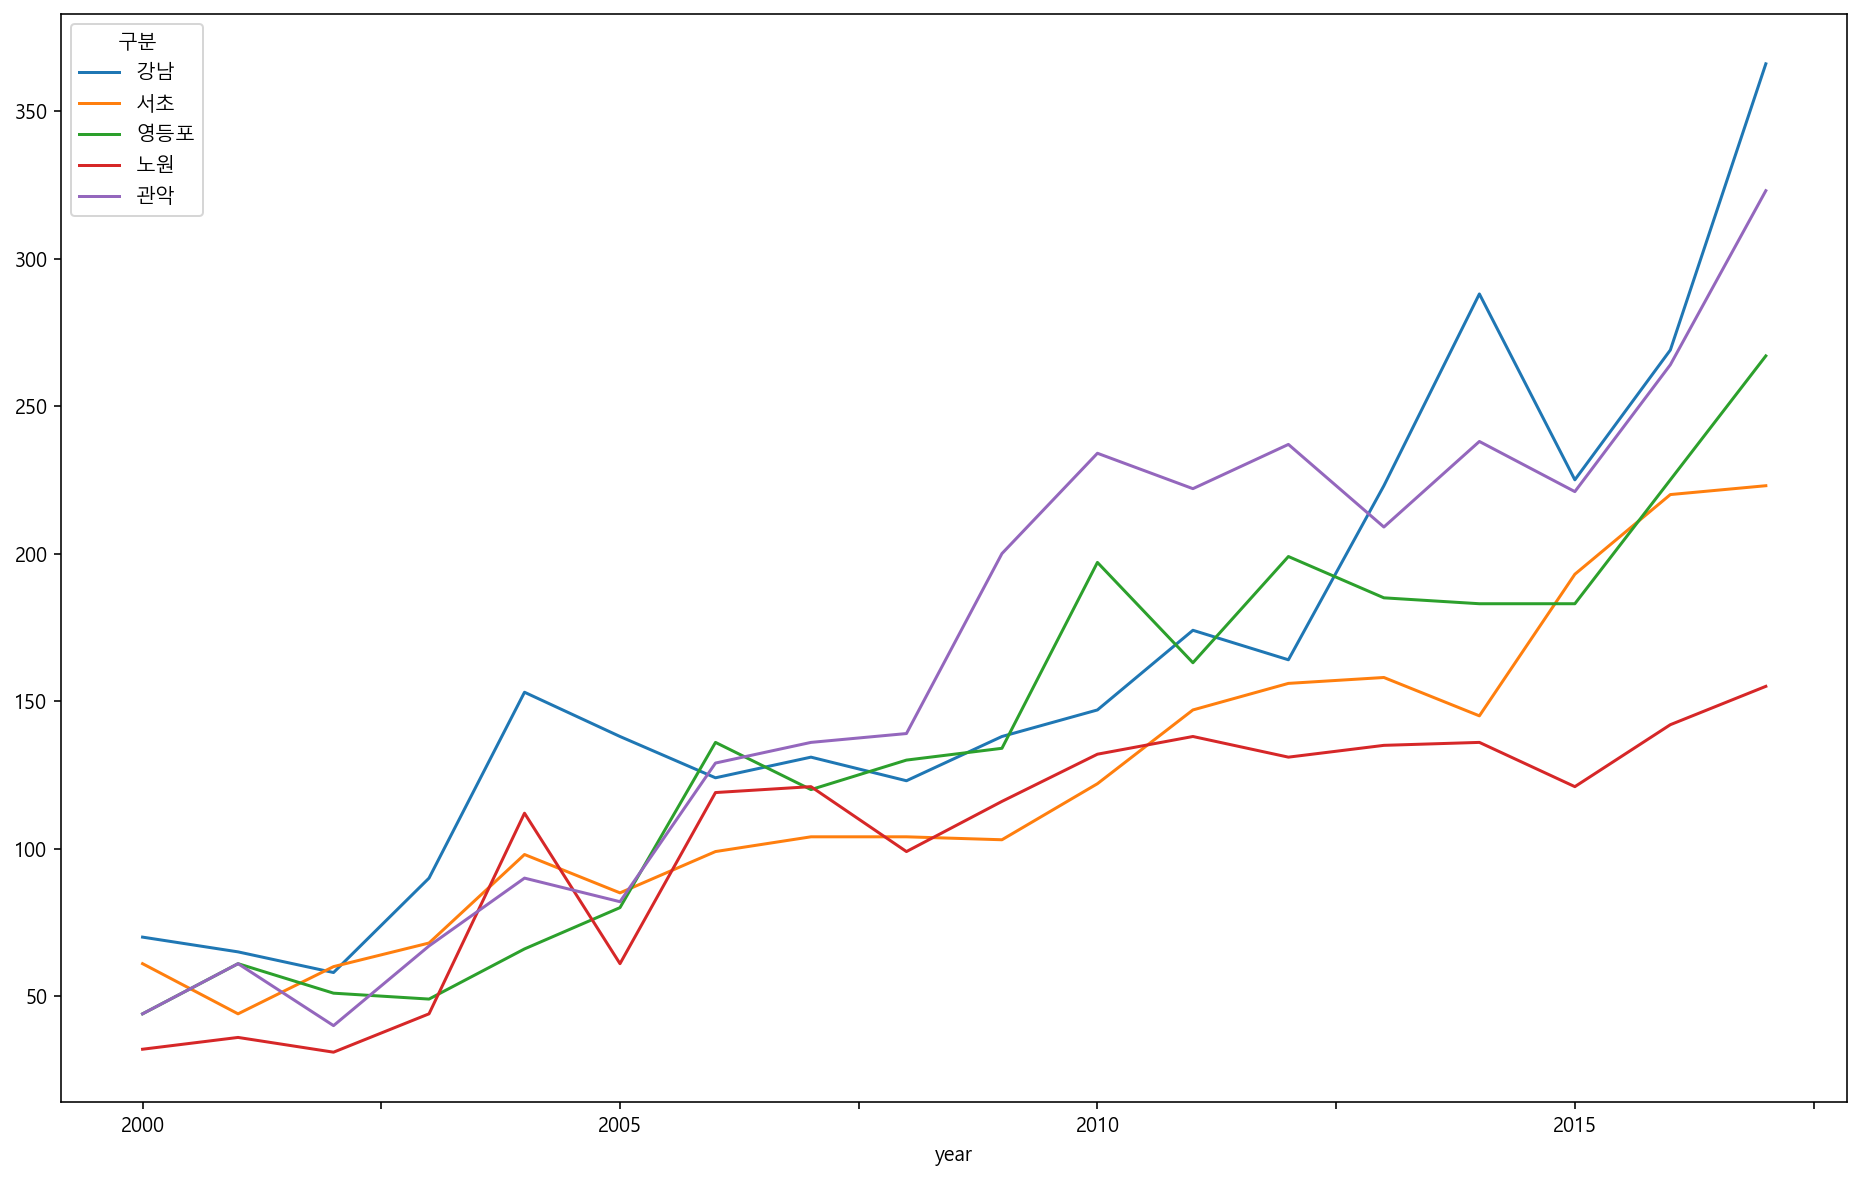

In [80]:
crime_total_sexual = crime_total.pivot('year','구분','강간')
crime_total_sexual[['강남','서초','영등포','노원','관악']].plot(figsize=(16,10))
plt.show()